# Confidence Intervals

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline


Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Suppose I weigh a sample of 50 jellybeans from a population of 10000 and find the average weight to be 1.25 grams. Can I take this figure to be a good estimate of the average weight of *all* jelly beans?

In a word, yes. (What else do I have to go on!?) But what I want now is a more or less precise way of indicating that this figure, though likely close to the true average, is inexact.

Natural idea: I'll say I'm confident that the real population value lies in some neighborhood or *interval* around the figure I obtained for my sample.

Notice that:

- The larger my sample, the more confident I may be about the sample's representativeness for the whole population;
- The larger I make the interval, the more confident I may be about the true population value falling within it.

## Interpretation

Here's another example: Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates (correctly!) an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that the true population mean beak length has a 90% chance of being somewhere between 8.6cm and 9.4cm. After all, the true mean either falls in that range or it doesn't. The notion of probability *here* doesn't seem to make much sense. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, we should expect 90% of those intervals to contain the true population mean.

In [2]:
# A normally distributed variable with a
# population size of 1000

pop = list(stats.norm.rvs(size=1000,
                          random_state=42))

In [3]:
# Let's calculate the population mean.

np.mean(pop)

0.01933205582232549

In [4]:
# And the population standard deviation.

pop_std = np.std(pop)
pop_std

0.9787262077473543

Let's say we take a sample of fifty from our population, and that we want an 80%-confidence interval for our estimate of the population mean. We proceed as follows:

In [5]:
z = stats.norm.ppf(0.9)
np.random.seed(42)
sample = np.random.choice(a=pop, size=50)
np.mean(sample)

0.17715311316172172

In [6]:
pop_std / np.sqrt(50) * z

0.17738312474862944

Thus we'd report our estimate of the population mean as 0.177 $\pm$ 0.177, or, equivalently, as (0, 0.354). Note that the true population mean of 0.0193 is in fact in this range.

## A Visual Interpretation of Confidence Intervals

Let's see if we can get an idea of how confidence intervals work by constructing a plot:

In [30]:
def ci_plotter(pop, sample_size, num_samples, conf):
    from scipy import stats
    intervals = []
    for _ in range(num_samples): # number of intervals
        sample = np.random.choice(pop, sample_size)
        step = np.std(pop) / np.sqrt(sample_size) # standard error
        semi_int_size = step * stats.norm.ppf(1 - (1-conf)/2)
        
        x_min = np.mean(sample) - semi_int_size # left endpt. of interval
        x_max = np.mean(sample) + semi_int_size # right endpt. of interval
        intervals.append(np.linspace(x_min, x_max, 30)) # add interval
                                                        # to intervals
    print(f'Since the confidence level is {conf} and the number of '
          f'samples is {num_samples}, we\'ll expect '\
          f'{conf}*{num_samples}={round(conf*num_samples)} intervals '\
          f'to contain the true population mean of {round(np.mean(pop), 5)}.')
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(intervals, range(num_samples), '.') # plot intervals evenly and
                                                # vertically
    ax.vlines(np.mean(pop), 0, num_samples, lw=3);

Since the confidence level is 0.9 and the number of samples is 20, we'll expect 0.9*20=18 intervals to contain the true population mean of 0.01933.


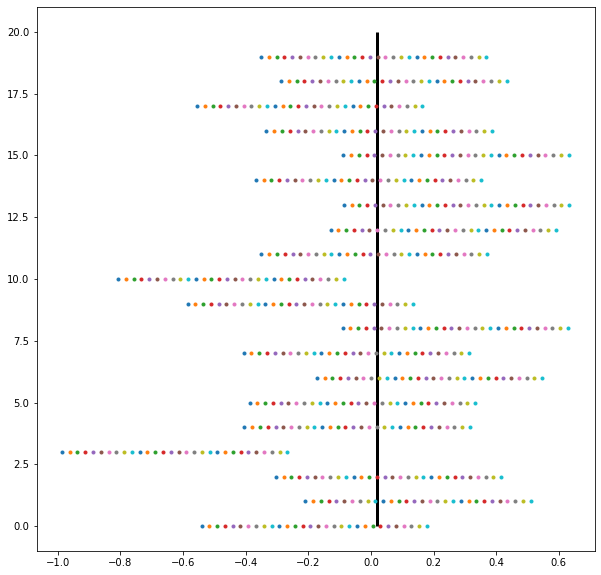

In [31]:
ci_plotter(pop=pop, sample_size=20, num_samples=20, conf=0.9)